 DOING LAST ORBIT AVERAGES....
  
 ....reading fort.6400 (LW)
       nlat= 64 nlon= 128 nlev= 10
  
       END OF FILE: DONE
 ....reading fort. 6401  (LW)
       END OF FILE: DONE
 ....reading fort. 6402  (LW)
       END OF FILE: DONE
 ....reading fort. 6403  (LW)
       END OF FILE: DONE
 ....reading fort. 6404  (LW)
       END OF FILE: DONE
 ....reading fort. 6405  (LW)
       END OF FILE: DONE
 ....reading fort. 6406  (LW)
       END OF FILE: DONE
 ....reading fort. 6407  (LW)
       END OF FILE: DONE
 ....reading fort. 6408  (LW)
       END OF FILE: DONE
 ....reading fort. 6409  (LW)
       END OF FILE: DONE
 ....reading fort. 6410  (LW)
       END OF FILE: DONE
 ....reading fort. 6411  (LW)
       END OF FILE: DONE
 ....reading fort. 6412  (LW)
       END OF FILE: DONE
 ....reading fort. 6413  (LW)
       END OF FILE: DONE
 ....reading fort. 6414  (LW)
       END OF FILE: DONE
 ....reading fort. 6415  (LW)
       END OF FILE: DONE
 ....reading fort. 6416  (LW)
       END OF FILE: 

 ....reading fort. 6558  (SW)
       END OF FILE: DONE
 ....reading fort. 6559  (SW)
       END OF FILE: DONE
 ....reading fort. 6560  (SW)
       END OF FILE: DONE
 ....reading fort. 6561  (SW)
       END OF FILE: DONE
 ....reading fort. 6562  (SW)
       END OF FILE: DONE
 ....reading fort. 6563  (SW)
       END OF FILE: DONE
 ....reading fort. 6564  (SW)
       END OF FILE: DONE
 ....reading fort. 6565  (SW)
       END OF FILE: DONE
 ....reading fort. 6566  (SW)
       END OF FILE: DONE
 ....reading fort. 6567  (SW)
       END OF FILE: DONE
 ....reading fort. 6568  (SW)
       END OF FILE: DONE
 ....reading fort. 6569  (SW)
       END OF FILE: DONE
 ....reading fort. 6570  (SW)
       END OF FILE: DONE
 ....reading fort. 6571  (SW)
       END OF FILE: DONE
 ....reading fort. 6572  (SW)
       END OF FILE: DONE
 ....reading fort. 6573  (SW)
       END OF FILE: DONE
 ....reading fort. 6574  (SW)
       END OF FILE: DONE
 ....reading fort. 6575  (SW)
       END OF FILE: DONE
 ....readi

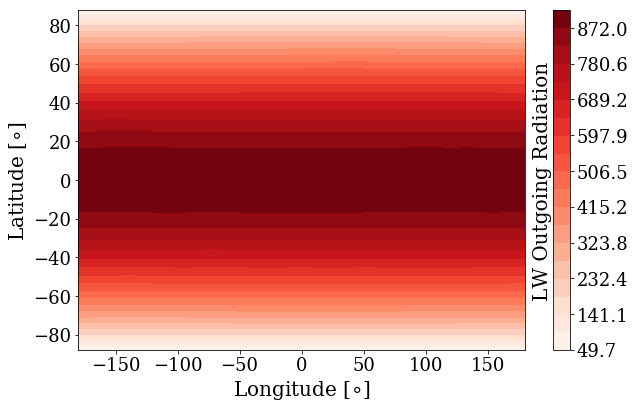

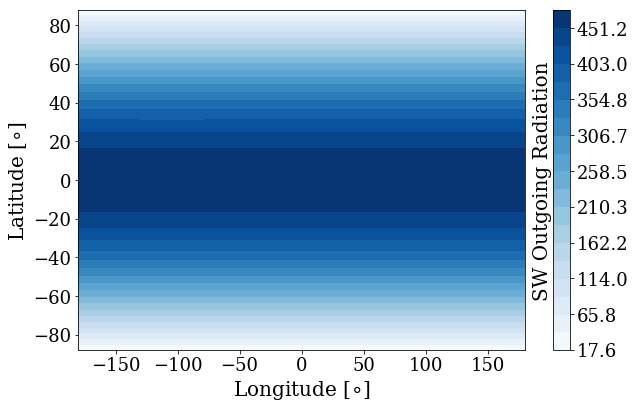

In [1]:
from igcm_olr_func import igcm_olr
%matplotlib inline

oom=0
p0=0.1
radea=9.56*10**6

#path='/Users/ermay/Desktop/GCM_plots/Files/'
path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'
runname='FiducialPlanet/Model4/L10/T42/P0_010'
makeplot=True
saveplot=True
LastOrb=True
savenamelw=path+runname+'/Model4_P0_015_lw.png'
savenamesw=path+runname+'/Model4_P0_015_sw.png'
both=True #true to plot SW and LW, False for only lW

data_lw,data_sw,total_lw,total_sw,lon_arr,lat_arr=igcm_olr(path,runname,oom,p0,radea,makeplot, saveplot,savenamelw,savenamesw, both,LastOrb)

import pickle
pickle.dump(total_lw, open(path+runname+'/LW_total.txt', 'wb'))
pickle.dump(total_sw, open(path+runname+'/SW_total.txt', 'wb'))

# read object from file
a = pickle.load(open(path+runname+'/LW_total.txt', 'rb'))
b = pickle.load(open(path+runname+'/SW_total.txt', 'rb'))


In [1]:
******************************
Total Integrated Output (W):
  LW: 8.311115743475926e+17
  SW: 4.278800639152812e+17
 sum: 1.2589916382628739e+18
-------------------------------
 Dayside Integrated Output (W):
  LW: 4.0926281612187603e+17
  SW: 2.106180002787225e+17
 sum: 6.198808164005985e+17
******************************

SyntaxError: invalid syntax (<ipython-input-1-c37cb67ab239>, line 1)

# Calculates incoming Radiation to Compare #


******************************
Total Integrated Input (W):
  SW: 1.5557159709971026e+18
******************************


Text(0.77,0.5,u'SW Incoming Radiation')

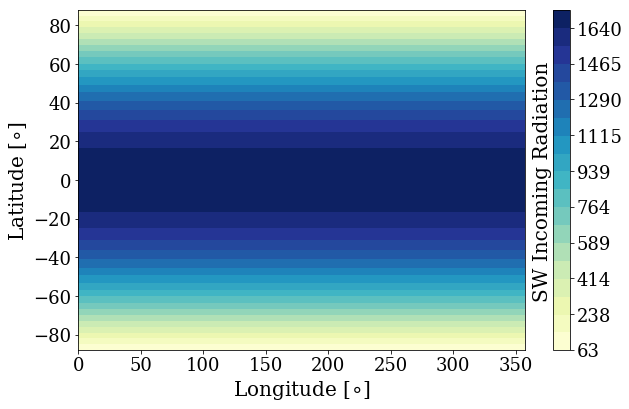

In [2]:
SOLC_IN=7680.  #input irradiation (fort.7)
TOA_ALB=0.3    #Top of Atmospher Albedo (fort.7)
radea=9.56*10**6

LDIUR=True      #Diurnal Average Logical Switch


#################################
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
from matplotlib.font_manager import FontProperties
params = {'font.family': 'serif',}
matplotlib.rcParams.update(params)


nlon=len(lon_arr)
nlat=len(lat_arr)
irr_arr=np.empty([nlon,nlat])

SOLC=SOLC_IN*(1.0-TOA_ALB)/np.pi

for j in range(0,nlat):
    irr_arr[:,j]=SOLC*np.cos(lat_arr[j]*np.pi/180.)
    
##################
total_in=np.nansum(irr_arr[:,:]*np.cos(lat_arr*np.pi/180.))*(2*np.pi/nlon)*(np.pi/nlat)*radea**2.
print '******************************'
print 'Total Integrated Input (W):'
print '  SW:', total_in
print '******************************'
    
plt.figure(2,figsize=(10,6.25))
LON,LAT=np.meshgrid(lon_arr,lat_arr)

cbar_levs=np.round_(np.linspace(np.nanmin(irr_arr)/1.01,np.nanmax(irr_arr)*1.01,20),2)

p=plt.contourf(LON,LAT,irr_arr.T,levels=cbar_levs,cmap=plt.cm.YlGnBu,zorder=0)
c=plt.colorbar(p)
c.ax.tick_params(labelsize=18)

plt.ylim(np.nanmin(lat_arr),np.nanmax(lat_arr))
plt.xlim(np.nanmin(lon_arr),np.nanmax(lon_arr))

plt.ylabel('Latitude [${\circ}$]',fontsize=20)
plt.xlabel('Longitude [${\circ}$]',fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.figtext(0.77,0.5,'SW Incoming Radiation',
            fontsize=20,rotation='vertical',ha='center',va='center')


In [3]:
print total_in/np.nansum([total_sw,total_lw])

1.2352845090961528
